In [78]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load model data loaded in starter notebook

In [63]:
gdf = gpd.read_file('../datasets/geojson')
gdf.describe()

,populacja_,populacj_1,populacj_2,populacj_3,msw_2016_p,education_,closest_po,area
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,8.831603,8.344637,6.569781,7.091580,163.382699,0.488539,0.105915,0.178312
std,9.073243,7.828296,6.144368,6.549458,109.608807,0.064001,0.132898,0.697215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.282613,0.000561,0.000005
25%,3.000000,3.000000,2.000000,2.000000,88.000000,0.450963,0.042082,0.006525
50%,6.000000,6.000000,5.000000,5.000000,143.000000,0.488910,0.071477,0.016798
75%,12.000000,11.000000,9.000000,10.000000,218.000000,0.530384,0.117122,0.058797
max,106.000000,79.000000,49.000000,66.000000,1269.000000,1.111683,1.926789,26.531773


In [64]:
gdf['center'] = gdf.centroid

In [65]:
gdf.head()

,st_astext,populacja_,populacj_1,populacj_2,populacj_3,msw_2016_p,education_,closest_po,area,geometry,center
0,MULTIPOLYGON(((19.9565040681133 50.00918067433...,19,19,17,9,281,0.508545,0.093079,0.008162,"POLYGON ((19.9564267646728 50.0091806743311, 1...",POINT (19.95544567430785 50.00894505389149)
1,MULTIPOLYGON(((19.9272599577811 50.06682772359...,3,0,2,17,41,0.574050,0.029664,0.005678,"POLYGON ((19.9267050375255 50.0668277235919, 1...",POINT (19.92677892088003 50.06701593463123)
2,MULTIPOLYGON(((19.9319759854035 50.07793862466...,0,0,1,5,56,0.490807,0.019101,0.005115,"POLYGON ((19.9319223340153 50.0779386246607, 1...",POINT (19.93177603911851 50.07817133734535)
3,MULTIPOLYGON(((20.0509611668009 50.07354064341...,7,3,4,4,100,0.418960,0.102686,0.005903,"POLYGON ((20.050820028585 50.0735406434159, 20...",POINT (20.0504180998416 50.07337388834839)
4,MULTIPOLYGON(((20.0475199444994 50.07630613211...,9,7,7,2,174,0.408816,0.044320,0.002612,"POLYGON ((20.0474672873805 50.076306132119, 20...",POINT (20.04722548816946 50.07637271112603)


In [66]:
gdf.keys()

Index(['st_astext', 'populacja_', 'populacj_1', 'populacj_2', 'populacj_3',
       'msw_2016_p', 'education_', 'closest_po', 'area', 'geometry', 'center'],
      dtype='object')

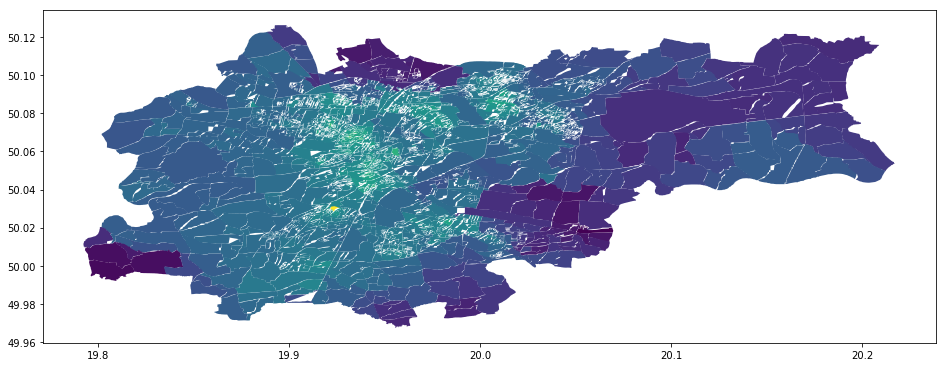

In [89]:
# plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')

gdf['education_log'] = np.log(gdf['education_'])
gdf.plot(column='education_log', figsize=(16,16))
plt.show()

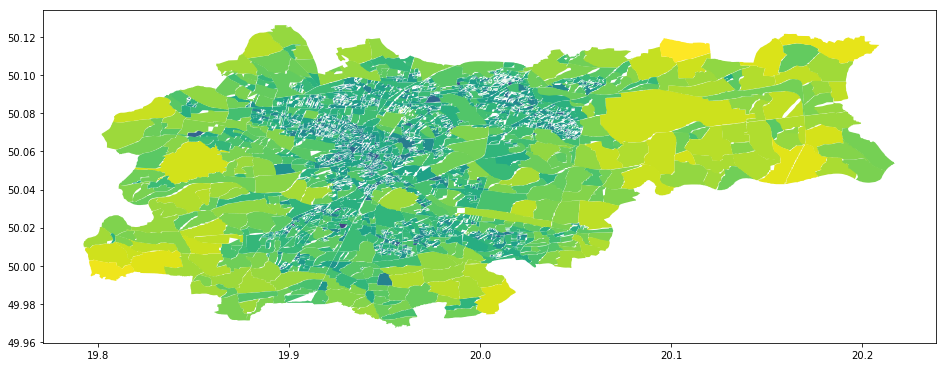

In [90]:
gdf['closest_po_log'] = np.log(gdf['closest_po'])
gdf.plot(column='closest_po_log', figsize=(16,16))
plt.show()

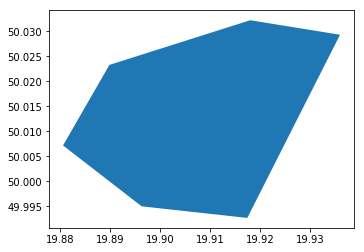

In [91]:
from shapely.geometry import Point, Polygon

filter_pts = [
    [50.00720051822555,19.880619061157176],
    [50.023305310107474,19.889888775512645],
    [50.03223783247384,19.918041241332958],
    [50.029336909961415,19.93599784604362],
    [49.99271183370883,19.917458417332682],
    [49.995029307046764,19.89634406796744],
]

filter_pts = [[filter_pts[i][1], filter_pts[i][0]] for i in range(len(filter_pts))]

poly = Polygon(filter_pts)
filter_gdf = gpd.GeoDataFrame([0], crs={"init": "epsg:4326"}, geometry=[poly])
filter_gdf.plot()
plt.show()

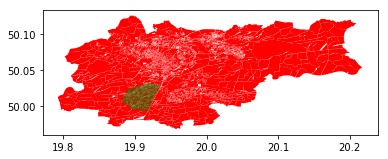

In [92]:
ax = gdf.plot(color='red');
ax= filter_gdf.plot(ax=ax, color='green', alpha=0.5);
plt.show()

In [93]:
# gdf.geometry[0]
# intersection = gpd.overlay(gdf, filter_gdf, how='union')  # NOT WORKING !!!!!

In [94]:
gdf.head()
gdf['poi_dist_relative'] = gdf['closest_po']/gdf['area']
gdf['poi_dist_relative_log'] = np.log(gdf['poi_dist_relative'])

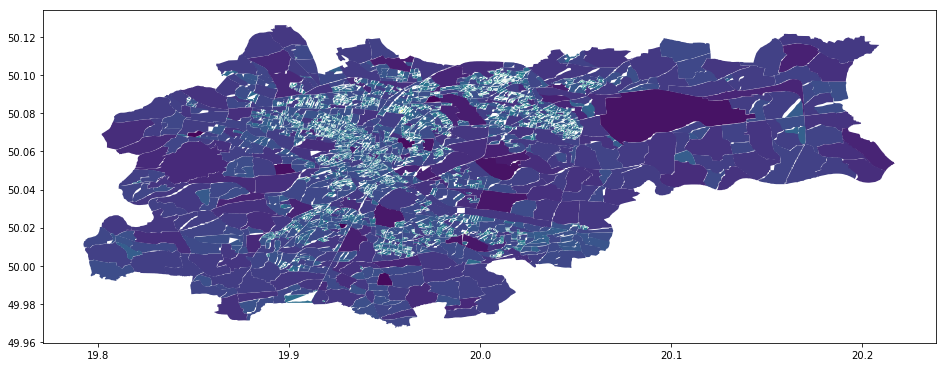

In [95]:
gdf.plot(column='poi_dist_relative_log', figsize=(16,16))
plt.show()

In [96]:
gdf['poi_dist_relative'].describe()

count     4335.000000
mean        35.435442
std        484.220010
min          0.019428
25%          1.018118
50%          3.301499
75%          9.966009
max      22736.284718
Name: poi_dist_relative, dtype: float64

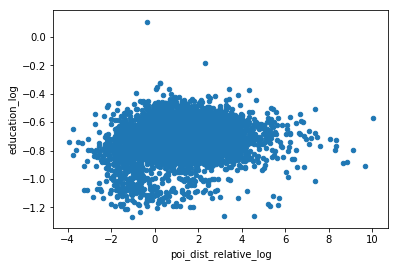

In [100]:
df = pd.DataFrame(gdf)
df.plot(x='poi_dist_relative_log', y='education_log', kind='scatter')

In [101]:
df.keys()

Index(['st_astext', 'populacja_', 'populacj_1', 'populacj_2', 'populacj_3',
       'msw_2016_p', 'education_', 'closest_po', 'area', 'geometry', 'center',
       'poi_dist_relative', 'poi_dist_relative_log', 'closest_po_log',
       'education_log'],
      dtype='object')

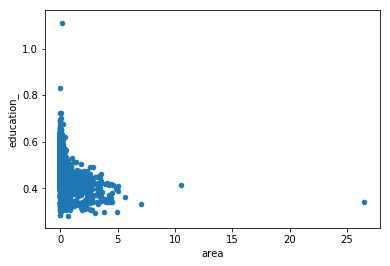

In [104]:
df.plot(x='area', y='education_', kind='scatter')

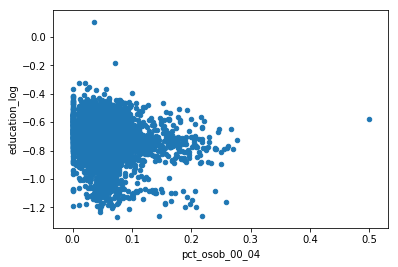

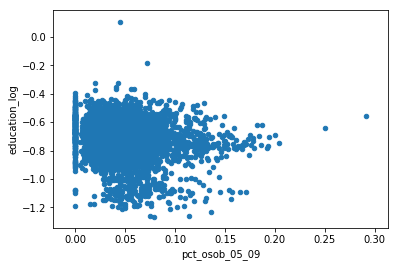

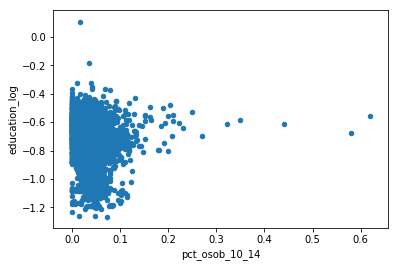

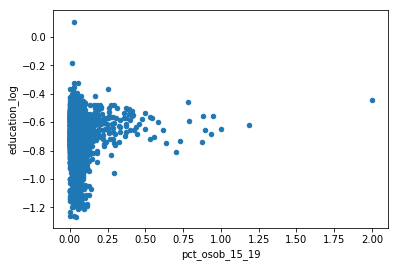

In [107]:
df['pct_osob_00_04'] = df['populacja_']/df['msw_2016_p']
df['pct_osob_05_09'] = df['populacj_1']/df['msw_2016_p']
df['pct_osob_10_14'] = df['populacj_2']/df['msw_2016_p']
df['pct_osob_15_19'] = df['populacj_3']/df['msw_2016_p']

for x in ['pct_osob_00_04', 'pct_osob_05_09', 'pct_osob_10_14', 'pct_osob_15_19']:
    df.plot(x=x, y='education_log', kind='scatter')
plt.show()